### Перед нами датасет *Spotify* с основными параметрами для более чем полумиллиона треков. Наша задача - проанализировать, с чем связана популярность треков.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
import scikit_posthocs as sp
import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf 

In [62]:
sns.set_theme(style="darkgrid")

In [63]:
df_tracks = pd.read_csv('tracks.csv', index_col='id', parse_dates=['release_date'])
df_tracks.head()

,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
id,,,,,,,,,,,,,,,,,,,
35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


---
### Описание столбцов:

- *id*  - уникальный код трека;
- *name* - название трека;
- *popularity* - популярность трека (0-100);
- *duration_ms* - продолжительность трека в миллисекундах;
- *explicit* - откровенное содержание в треке (обсценная лексика, сексуальный контент, насилие и т.д.);
- *artists* - имя исполнителя(-ей);
- *id_artists* - уникальный код исполнителя(-ей);
- *release_date* - дата выхода трека;
- *danceability* - танцевальность (0-1)
- *energy* - энергичность (0-1);
- *key* - тональность трека (0 - до, 1 - до-диез, 2 - ре и т.д.)
- *loudness* - громкость (0-1);
- *mode* - лад (0 - минорный, 1 - мажорный);
- *speechiness* - присутствие разговорной речи (0-1);
- *acousticness* - акустичность, доля присутствия акустических инструментов (0-1);
- *instrumentalness* - инструментальность, насколько много времени отводится инструментам без участия голоса (0-1);
- *liveness* - присутствие аудитории, слушателей в треке (0-1);
- *valence* - уровень "счастья" в треке (чем ближе к 0 - тем более грустно. Чем ближе к 1 - тем более радостно);
- *tempo* - темп (количество ударов в минуту, или BPM);
- *time_signature* - музыкальный размер (3/4, 4/4, 5/4);


In [64]:
df_tracks.shape

(586672, 19)

In [65]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 586672 entries, 35iwgR4jXetI318WEWsa1Q to 5Ocn6dZ3BJFPWh4ylwFXtn
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   name              586601 non-null  object        
 1   popularity        586672 non-null  int64         
 2   duration_ms       586672 non-null  int64         
 3   explicit          586672 non-null  int64         
 4   artists           586672 non-null  object        
 5   id_artists        586672 non-null  object        
 6   release_date      586672 non-null  datetime64[ns]
 7   danceability      586672 non-null  float64       
 8   energy            586672 non-null  float64       
 9   key               586672 non-null  int64         
 10  loudness          586672 non-null  float64       
 11  mode              586672 non-null  int64         
 12  speechiness       586672 non-null  float64       
 13  acousticness      586672 no

In [66]:
df_tracks.isna().sum()

name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

Очистим данные от null'ов, создадим колонку с годами, и переведём миллисекунды в минуты

In [67]:
df_tracks = df_tracks.dropna()
df_tracks['year'] = pd.DatetimeIndex(df_tracks['release_date']).year 
df_tracks['duration_ms'] = df_tracks['duration_ms'] / 60000
df_tracks = df_tracks.rename(columns = {'duration_ms': 'duration_min_unformatted'})
df_tracks.head()

,name,popularity,duration_min_unformatted,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
id,,,,,,,,,,,,,,,,,,,,
35iwgR4jXetI318WEWsa1Q,Carve,6,2.115050,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922
021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,1.636667,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922
07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,3.027333,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922
08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,2.948450,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922
08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,2.718000,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,1922


Также изменим значения внутри колонок <b> key, mode и time_signature </b>, чтобы сделать их более понятными человеку.
Для удобства будем использовать англоязычную традицию записи нот.

In [68]:
df_tracks['key'] = df_tracks.key.replace({0: 'C', 1: 'C#/D♭', 2: 'D', 3: 'D#/E♭', 4: 'E', 5: 'F', 6: 'F#/G♭', 7: 'G', \
                                         8: 'G#/A♭', 9: 'A', 10: 'A#/B♭', 11: 'B'})
df_tracks['mode'] = df_tracks['mode'].replace({0: 'minor', 1: 'major'})
df_tracks['time_signature'] = df_tracks.time_signature.replace({3: '3/4', 4: '4/4', 5: '5/4'})

In [69]:
# Проверка

print(df_tracks.key.unique())
print(df_tracks['mode'].unique())
print(df_tracks.time_signature.unique())

['C' 'C#/D♭' 'G' 'D#/E♭' 'F' 'E' 'F#/G♭' 'B' 'D' 'G#/A♭' 'A#/B♭' 'A']
['major' 'minor']
['3/4' 1 '5/4' '4/4' 0]


Всё сходится, за исключением 'time_signature'. Так как мы не знаем, что имеется в виду под 0 и 1 в плане музыкального размера, оставим эти значения, как есть, и не будем учитывать в дальнейшем.

Взглянем на heatmap корреляций, чтобы понять, какие интересные связи уже имеются.

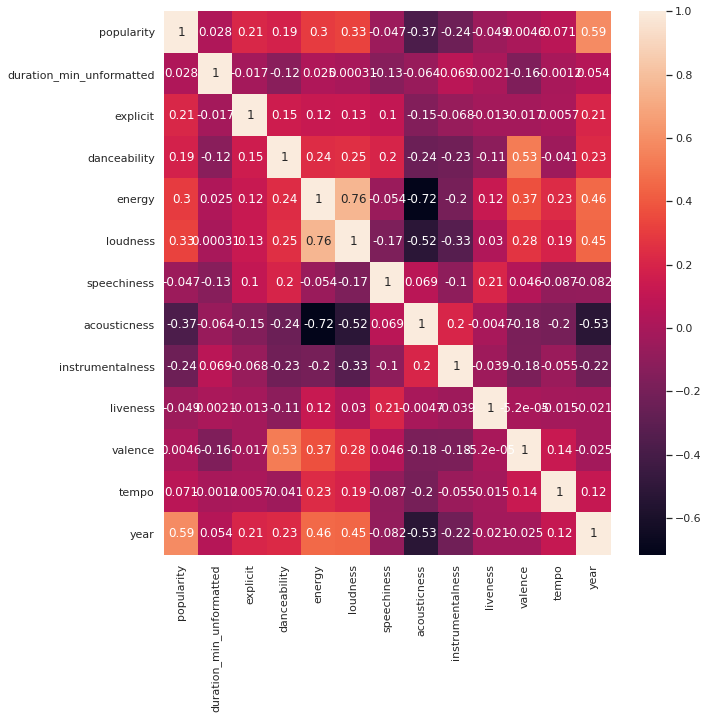

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(df_tracks.corr(), annot=True);

Почти всё выглядит логично: чем выше громкость или энергия, тем ниже акустичность трека. Но есть также значимая корреляция (0.53) между годом и акустичностью - видимо, в современных треках больше внимания отводится электронным инструментам. Ещё есть существенная связь (0.59) между популярностью трека и годом его выпуска. 

---
---
Наличие большого количества переменных позволяет нам поставить перед собой ряд вопросов:
- Сколько в среднем длятся самые популярные треки? Связана ли  их популярность и продолжительность?
- В какой день недели чаще всего выпускают треки? Как это сказывается на их популярности?
- Какая динамика показателя explicit - присутствия в треках обсценной лексики? Противоположна ли она "уровню счастья" (valence) треков? Имеется ли различие valence в группах с наличием и отсутствием мата соответственно?

---
---
Для начала найдём самые популярные треки и их продолжительность.

In [71]:
top_popular = df_tracks[['name', 'popularity', 'duration_min_unformatted']] \
    .sort_values('popularity', ascending=False) 
top_15_popular = top_popular.head(15)
top_15_popular.head()

,name,popularity,duration_min_unformatted
id,,,
4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,3.301367
7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,4.033567
3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,2.213000
6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,2.669850
5QO79kh1waicV47BqGRL3g,Save Your Tears,97,3.593783


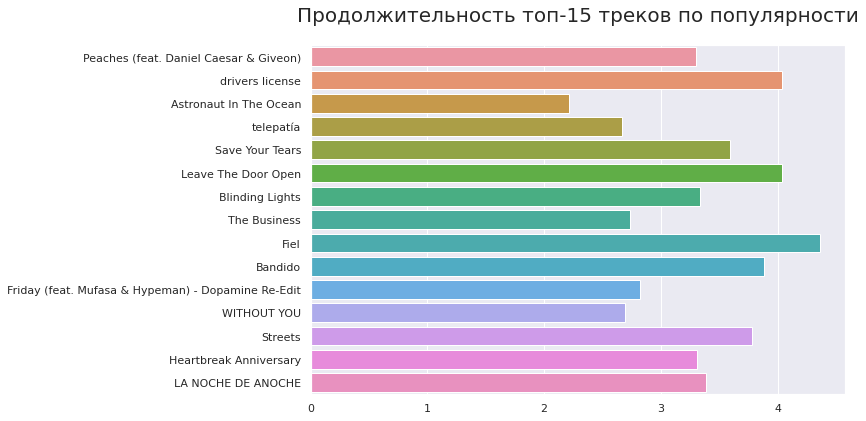

In [72]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_15_popular, y='name', x='duration_min_unformatted', order=top_15_popular \
                 .sort_values('popularity', ascending=False).name)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11, fontweight='normal')
plt.title('Продолжительность топ-15 треков по популярности', fontsize=20, y=1.05)
ax.set(xlabel=None, ylabel=None)
plt.tight_layout()
plt.show()

Высчитаем среднюю продолжительность самых популярных (выше 99% перцентиля) треков.

In [73]:
most_popular = top_popular.popularity.quantile(q=0.99)
top_median_duration = top_popular.query('popularity >= @most_popular').duration_min_unformatted.median()
top_median_duration

3.4797833333333332

Выходит, чтобы ваш трек попал в чарты он должен длиться около 3,5 минут (мы взяли медиану, чтобы обезопасить от себя от выбросов). Но думаю, сейчас ситуация меняется + влияет количество данных по годам (смотри график ниже).

Text(0.5, 1.0, 'Распределение музыки по годам')

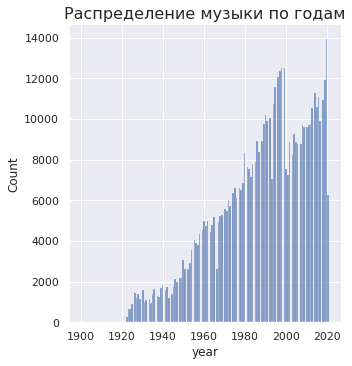

In [74]:
sns.displot(df_tracks.year);
plt.title('Распределение музыки по годам', fontsize=16)

Но всё-таки так ли важна продолжительность? Была ведь "Богемская рапсодия" или "Paranoid Android", и ничего...

In [75]:
model_lin = sm.OLS.from_formula("popularity ~ duration_min_unformatted", data=df_tracks)
result_lin = model_lin.fit()
result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     448.4
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           1.73e-99
Time:                        11:56:35   Log-Likelihood:            -2.5395e+06
No. Observations:              586601   AIC:                         5.079e+06
Df Residuals:                  586599   BIC:                         5.079e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   26.6501      0.050    535.700      0.000      26.553      26.748
duration_min_unformatted     0.2407      0.011     21.176      0.000       0.218       0.263
==============================================================================
Omnibus:                    28845.073   Durbin-Watson:                   0.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17185.489
Skew:                           0.280   Prob(JB):                         0.00
Kurtosis:                       2.376   Cond. No.                         9.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Несмотря на то, что мы получили статзначимую разницу (<b>P>|t| = 0</b>), всего лишь <u> 0.1% изменчивости</u> (<b>Adj. R-squared</b>) популярности трека объясняется его продолжительностью. Кажется, в музыке важно не только, сколько она длится.

Но при этом взгляните на график ниже - длина треков, начиная где-то с 2010 года, стремительно снижается! Ситуация парадоксальная. Возможно, если данный тренд сохранится, то это начнёт влиять на популярность.

Text(0.5, 1.0, 'Динамика средней продолжительности трека по годам')

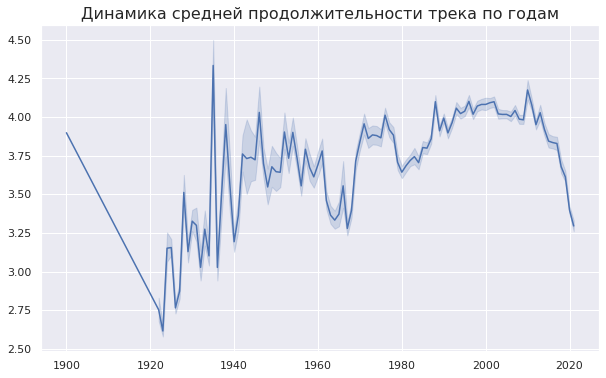

In [76]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="year", y="duration_min_unformatted", data=df_tracks)
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.title('Динамика средней продолжительности трека по годам', fontsize=16)

---
Теперь взглянем на разрез по дням недели.

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


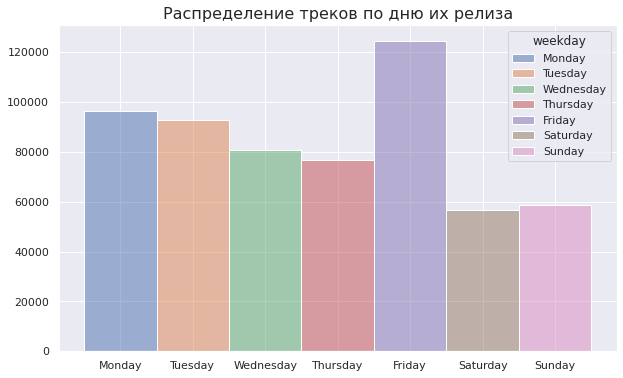

In [77]:
df_tracks['weekday'] = pd.to_datetime(df_tracks['release_date']).dt.day_name()
df_tracks_days = df_tracks[['popularity', 'weekday']]
df_tracks_days['weekday'] = pd.Categorical(df_tracks_days['weekday'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10,6))
ax = sns.histplot(data=df_tracks_days, x="weekday", hue="weekday");
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.title('Распределение треков по дню их релиза', fontsize=16);

Большинство релизов приходится на пятницу, но также имеется резкий скачок вверх между воскресеньем и понедельником - релиз также часто происходит к началу рабочей недели. Но влияет ли это на их популярность?

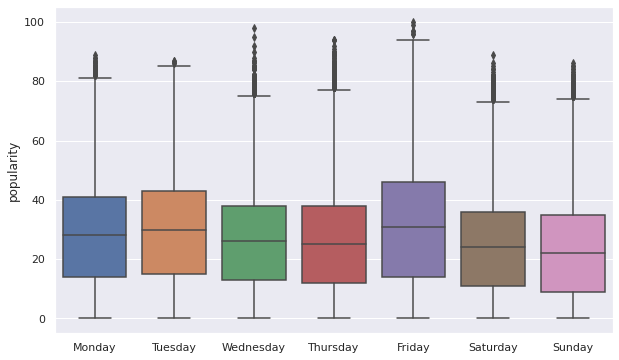

In [78]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="weekday", y="popularity", data=df_tracks_days)
ax.set(xlabel=None);

Между графиками  имеются небольшие различия - но значимы ли они? Проведём дисперсионный анализ, чтобы выяснить.
Для начала поймём, соблюдается ли требование о гомогенности дисперсий.

In [79]:
st.levene(df_tracks_days.query('weekday == "Monday"').popularity, df_tracks_days.query('weekday == "Tuesday"').popularity, \
                   df_tracks_days.query('weekday == "Wednesday"').popularity, df_tracks_days.query('weekday == "Thursday"').popularity, \
                   df_tracks_days.query('weekday == "Friday"').popularity, df_tracks_days.query('weekday == "Saturday"').popularity, \
                   df_tracks_days.query('weekday == "Sunday"').popularity)

LeveneResult(statistic=1554.55935439781, pvalue=0.0)

<b> p < 0.05 </b> => дисперсии не равны. Тогда нам потребуется тест Краскела-Уоллиса.

In [80]:
st.kruskal(df_tracks_days.query('weekday == "Monday"').popularity, df_tracks_days.query('weekday == "Tuesday"').popularity, \
                   df_tracks_days.query('weekday == "Wednesday"').popularity, df_tracks_days.query('weekday == "Thursday"').popularity, \
                   df_tracks_days.query('weekday == "Friday"').popularity, df_tracks_days.query('weekday == "Saturday"').popularity, \
                   df_tracks_days.query('weekday == "Sunday"').popularity)

KruskalResult(statistic=10175.040539936668, pvalue=0.0)

<b> p < 0.05 </b> => хотя бы одна из групп статзначимо отличается от других по параметру популярности.

Чтобы узнать, между какими именно группами есть различия, применим post-hoc тест Коновера.

In [81]:
monday = list(df_tracks_days.query('weekday == "Monday"').popularity)
tuesday= list(df_tracks_days.query('weekday == "Tuesday"').popularity)
wednesday = list(df_tracks_days.query('weekday == "Wednesday"').popularity)
thursday = list(df_tracks_days.query('weekday == "Thursday"').popularity)
friday = list(df_tracks_days.query('weekday == "Friday"').popularity)
saturday = list(df_tracks_days.query('weekday == "Saturday"').popularity)
sunday = list(df_tracks_days.query('weekday == "Sunday"').popularity)

week = [monday, tuesday, wednesday, thursday, friday, saturday, sunday]

In [82]:
sp.posthoc_conover(week, p_adjust='holm').rename(columns={1: 'Monday', 2: 'Tuesday', \
                                                        3: 'Wednesday', 4 : 'Thursday', 5: 'Friday', \
                                                        6: 'Saturday', 7: 'Sunday'},
                                                       index={1: 'Monday', 2: 'Tuesday', \
                                                        3: 'Wednesday', 4 : 'Thursday', 5: 'Friday', \
                                                        6: 'Saturday', 7: 'Sunday'})

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Monday,1.000000e+00,1.138183e-62,4.227225e-96,8.523997e-123,3.279869e-172,4.602653e-291,0.000000e+00
Tuesday,1.138183e-62,1.000000e+00,1.287395e-294,0.000000e+00,5.028470e-23,0.000000e+00,0.000000e+00
Wednesday,4.227225e-96,1.287395e-294,1.000000e+00,3.565248e-03,0.000000e+00,1.063557e-64,4.082336e-268
Thursday,8.523997e-123,0.000000e+00,3.565248e-03,1.000000e+00,0.000000e+00,1.102502e-45,6.907900e-224
Friday,3.279869e-172,5.028470e-23,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
Saturday,4.602653e-291,0.000000e+00,1.063557e-64,1.102502e-45,0.000000e+00,1.000000e+00,6.974962e-60
Sunday,0.000000e+00,0.000000e+00,4.082336e-268,6.907900e-224,0.000000e+00,6.974962e-60,1.000000e+00


Интересно - значимые различия есть между <b> всеми </b> днями. 
Проведём также ANOVA-тест Уэлча с критерием Геймса-Хоувелла, чтобы дополнительно проверить получившиеся значения.

In [83]:
pg.welch_anova(dv='popularity', between='weekday', data=df_tracks)

,Source,ddof1,ddof2,F,p-unc,np2
0,weekday,6,240820.204852,1906.839245,0.0,0.019366


<b> p < 0.05 </b> => имеется значимая разница популярности между группами.

In [84]:
pg.pairwise_gameshowell(data=df_tracks, dv='popularity',
                        between='weekday').round(3)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Friday,Monday,30.924,28.063,2.860,0.081,35.212,218873.984,0.000,0.151
1,Friday,Saturday,30.924,24.603,6.321,0.091,69.128,132615.453,0.000,0.350
2,Friday,Sunday,30.924,22.956,7.968,0.091,87.886,138239.699,0.000,0.440
3,Friday,Thursday,30.924,26.181,4.743,0.087,54.585,179682.982,0.000,0.250
4,Friday,Tuesday,30.924,29.580,1.344,0.084,15.982,210287.563,0.000,0.069
5,Friday,Wednesday,30.924,26.268,4.656,0.083,55.953,194127.400,0.000,0.253
6,Monday,Saturday,28.063,24.603,3.461,0.090,38.309,123196.631,0.000,0.203
7,Monday,Sunday,28.063,22.956,5.107,0.090,57.035,128061.486,0.000,0.299
8,Monday,Thursday,28.063,26.181,1.883,0.086,21.961,163356.202,0.000,0.106
9,Monday,Tuesday,28.063,29.580,-1.516,0.083,-18.288,187930.889,0.000,-0.084


Результат тот же самый. Только здесь мы видим, что статзначимой разницы между популярностью треков, выпущенных в четверг и среду, нет. Видимо, действительно имеет смысл подбирать день для релиза трека, чтобы его слушало как можно больше людей.

---
Наконец, взглянем на то, как менялись explicit и valence треков.

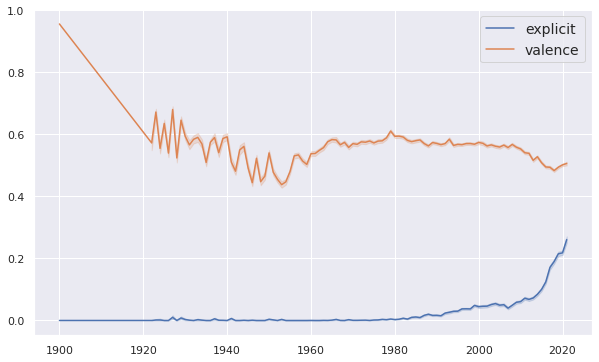

In [85]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="year", y="explicit", data=df_tracks);
ax = sns.lineplot(x="year", y="valence", data=df_tracks);
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.legend(['explicit', 'valence'], fontsize=14)

Картина неоднозначня - откровенность в треках довольно резко растёт (в т.ч. за счёт роста популярности репа), а настроение держится примерно на одном уровне. Однако любопытно, что valence начал падать, а explicit расти около 1980 года. Можно строить разные гипотезы, но думаю, это снова связано с распределением данных по годам.

Однако давайте возьмём две группы - (explicit = 0) и (explicit = 1) и сравним их valence. 

In [86]:
df_non_explicit = df_tracks.query('explicit == 0')
df_explicit = df_tracks.query('explicit == 1')

In [87]:
df_non_explicit.shape[0] /df_explicit.shape[0]

21.680211877513145

Размер первой группы в 21 раз больше второй. А что насчёт нормальности распределения?

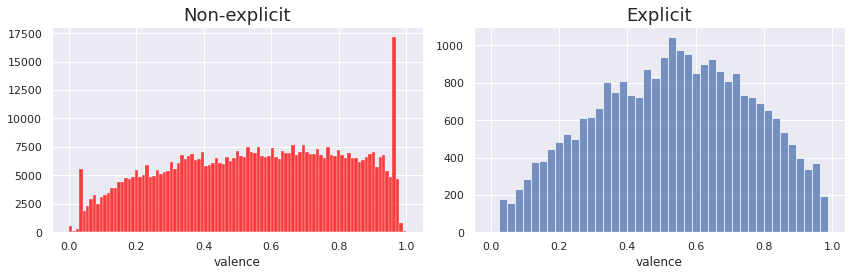

In [88]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(df_non_explicit.valence, ax=ax1, color='red')
ax1.set_title('Non-explicit', fontsize=18)
ax1.set(ylabel=None)
sns.histplot(df_explicit.valence,ax=ax2)
ax2.set_title('Explicit', fontsize=18)
ax2.set(ylabel=None)
plt.tight_layout()
plt.show()

In [89]:
print(st.kstest(df_explicit.valence, 'norm'))
print(st.kstest(df_non_explicit.valence, 'norm'))

KstestResult(statistic=0.5154799508578757, pvalue=0.0)
KstestResult(statistic=0.511011718389428, pvalue=0.0)


Если второй график напоминает нормальное распределение, то первый распределен преимущественно равномерно за исключением двух выбросов по краям. Ненормальность распределений подтверждает тест Колмогорова-Смирнова.

Проверим равность дисперсий.

In [90]:
st.levene(df_explicit.valence, df_non_explicit.valence)

LeveneResult(statistic=1332.539821679342, pvalue=2.0444757417166597e-291)

<b>p < 0.05</b> => группы имеют разные дисперсии.
Чтобы проверить наличие разницы в средних между группами, прибегнем к помощи t-теста Уэлча.
    
Так как у нас имелись выбросы на графике Non-explicit, дополнительно проведём усечение среднего (trim) и посмотрим, изменится ли p-value на экстремальных значениях.

In [91]:
st.ttest_ind(df_explicit.valence, df_non_explicit.valence, equal_var=False)

Ttest_indResult(statistic=-14.251775746264196, pvalue=6.245567069060077e-46)

In [92]:
st.ttest_ind(df_explicit.valence, df_non_explicit.valence, equal_var=False, trim=0.49)

Ttest_indResult(statistic=-12.765763974495242, pvalue=2.7680309789091984e-33)

В обоих случаях <b>p < 0.05</b> => есть статзначимая разница между средними этих двух групп.
    
Получается, "уровень счастья" (valence) отличается между треками, где есть обсценная лексика, и там где её нет.

### Выводы

- Самые популярные треки в среднем длятся 3,5 минуты. Связи между продолжительностью и популярностью не было обнаружено, но имеется тренд на уменьшение длительности.
- Чаще всего треки выпускают в пятницу, и это значимо сказывается на их популярности. Впрочем, любой другой день релиза (кроме пары четверг-среда) также статзначимо отличается от остальных с точки зрения популярности.
- Имеется сильный тренд на увеличение доли обсценной лексики в песнях и менее выраженный на изменение их настроения в сторону более грустного/агрессивного. Выяснилось также, что есть значимые различия в настроении между песнями с матом и без.